In [39]:
import yfinance as yf
import os
import pandas as pd

In [40]:
btc_ticker = yf.Ticker("BTC-USD")

In [41]:
btc = btc_ticker.history(period="max")

In [42]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-31 00:00:00+00:00,69647.781250,71377.781250,69624.867188,71333.648438,20050941373,0.0,0.0
2024-04-01 00:00:00+00:00,71333.484375,71342.093750,68110.695312,69702.148438,34873527352,0.0,0.0
2024-04-02 00:00:00+00:00,69705.023438,69708.382812,64586.593750,65446.972656,50705240709,0.0,0.0


In [43]:
btc.index = btc.index.tz_localize(None)

In [44]:
del btc["Dividends"]
del btc["Stock Splits"]

In [45]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

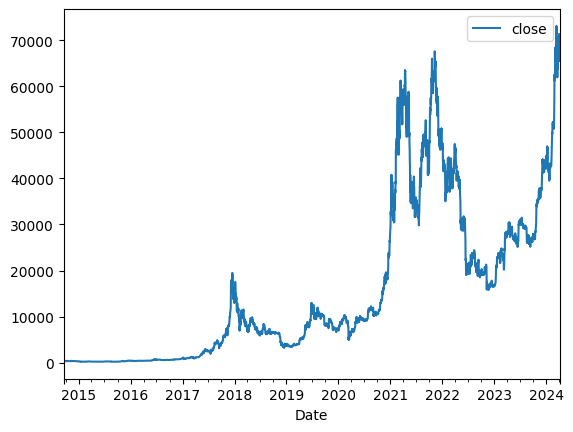

In [46]:
btc.plot.line(y="close", use_index=True)

In [47]:
wiki_data = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [48]:
wiki_data

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-03-31,0.200000,-0.070932,0.083333
2024-04-01,0.200000,-0.070932,0.083333
2024-04-02,0.200000,-0.070932,0.083333
2024-04-03,0.266667,-0.070988,0.100000


In [49]:
btc = btc.merge(wiki_data, left_index=True, right_index=True)

In [50]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2024-03-31,69647.781250,71377.781250,69624.867188,71333.648438,20050941373,0.200000,-0.070932,0.083333
2024-04-01,71333.484375,71342.093750,68110.695312,69702.148438,34873527352,0.200000,-0.070932,0.083333
2024-04-02,69705.023438,69708.382812,64586.593750,65446.972656,50705240709,0.200000,-0.070932,0.083333
2024-04-03,65446.671875,66914.320312,64559.898438,65980.812500,34488018367,0.266667,-0.070988,0.100000


In [51]:
btc["tomorrow"] = btc["close"].shift(-1)

In [52]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2024-03-31,69647.781250,71377.781250,69624.867188,71333.648438,20050941373,0.200000,-0.070932,0.083333,69702.148438
2024-04-01,71333.484375,71342.093750,68110.695312,69702.148438,34873527352,0.200000,-0.070932,0.083333,65446.972656
2024-04-02,69705.023438,69708.382812,64586.593750,65446.972656,50705240709,0.200000,-0.070932,0.083333,65980.812500
2024-04-03,65446.671875,66914.320312,64559.898438,65980.812500,34488018367,0.266667,-0.070988,0.100000,69049.468750


In [53]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [54]:
btc["target"].value_counts()

target
1    1850
0    1638
Name: count, dtype: int64

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [58]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5227272727272727

In [59]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [68]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [69]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [70]:
precision_score(predictions["target"], predictions["predictions"])

0.5052083333333334

In [72]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors += [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [73]:
btc, new_predictors = compute_rolling(btc.copy())

In [74]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,69647.781250,71377.781250,69624.867188,71333.648438,20050941373,0.200000,-0.070932,0.083333,69702.148438,0,...,0.5,1.016938,0.261905,0.571429,1.207287,0.777222,0.633333,1.954416,1.928493,0.512329
2024-04-01,71333.484375,71342.093750,68110.695312,69702.148438,34873527352,0.200000,-0.070932,0.083333,65446.972656,0,...,0.5,0.994199,0.233333,0.428571,1.170880,0.774444,0.616667,1.903785,1.927580,0.512329
2024-04-02,69705.023438,69708.382812,64586.593750,65446.972656,50705240709,0.200000,-0.070932,0.083333,65980.812500,1,...,0.0,0.942223,0.214286,0.285714,1.092591,0.771667,0.600000,1.782539,1.926941,0.512329
2024-04-03,65446.671875,66914.320312,64559.898438,65980.812500,34488018367,0.266667,-0.070988,0.100000,69049.468750,1,...,0.5,0.956745,0.209524,0.428571,1.094502,0.770000,0.616667,1.792023,1.926484,0.512329


In [75]:
predictions = backtest(btc, model, new_predictors)

In [76]:
precision_score(predictions["target"], predictions["predictions"])

0.5263157894736842

In [77]:
predictions

,target,predictions
2017-09-16,0,0
2017-09-17,1,1
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2024-03-31,0,0
2024-04-01,0,0
2024-04-02,1,0
2024-04-03,1,1
